In [18]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import datetime
from scipy.stats import norm
%matplotlib inline

In [19]:
# Data https://www.statbureau.org/ru/russia/inflation-tables
inf_rates=[2.33,1.04,0.64,0.89,1.75,2.55,1.79,0.98,1.32,2.11,1.52,1.64,2.76,2.28,1.86,1.79,1.78,1.62,0.45,0.01,0.60,1.09,1.36,1.60,
        3.09,1.16,1.08,1.16,1.69,0.53,0.72,0.09,
        0.40,1.07,1.61,1.54,2.40,1.63,1.05,1.02,0.80,0.80,0.71,-0.41,0.34,1.00,0.96,1.10,1.75,0.99,0.75,0.99,0.74,0.78,0.92,0.42,
        0.43,1.14,1.11,1.14,2.62,1.23,1.34,
        1.12,0.80,0.64,0.46,-0.14,0.25,0.55,0.74,0.82,2.43,1.66,0.82,0.35,0.48,0.28,0.67,0.19,0.09,0.28,0.63,0.79,1.68,1.11,
        0.59,0.57,0.63,0.95,0.87,0.09,0.79,1.64,
        1.23,1.13,2.31,1.20,1.20,1.42,1.35,0.97,0.51,0.36,0.80,0.91,0.83,0.69,2.37,1.65,1.31,0.69,0.57,0.60,0.63,0.00,-0.03,
        0.00,0.29,0.41,1.64,0.86,0.63,0.29,0.50,0.39,
        0.36,0.55,0.84,0.50,0.81,1.08,2.37,0.78,0.62,0.43,0.48,0.23,-0.01,-0.24,-0.04,0.48,0.42,0.44,0.50,0.37,
        0.58,0.31,0.52,0.89,1.23,0.10,0.55,0.46,0.34,0.54,0.97,0.56,0.34,0.51,0.66,0.42,0.82,0.14,0.21,0.57,0.56,0.51,0.59,0.70,
        1.02,0.90,0.90,0.62,0.49,0.24,0.65,0.82,1.28,2.62,3.85,2.22,1.21,0.46,0.35,0.19,0.80,0.35,0.57,0.74,0.75,0.77,0.96,0.63,
        0.46,0.44,0.41,0.36,0.54,0.01,0.17,0.43,0.44,0.40,0.62,0.22,0.13,0.33,0.37,0.61,0.07,-0.54,-0.15,0.20,0.22,0.42,0.31,0.21,0.29,
        0.38,0.38,0.49,0.27,0.01,0.16,0.35,0.50,0.84,1.01,0.44,0.32,0.29,0.34,0.04,0.20,-0.24,-0.16,0.13,0.28,0.36,0.40,0.33,
        0.55,0.83,0.27,0.22,0.35,-0.04,-0.07,0.43,0.433]

In [69]:
index = pd.date_range(start='1/1/2000', end='11/1/2020', freq='MS')
df_inf= pd.DataFrame(index=index)
df_inf['Rate']=inf_rates
df_inf['Rate']=df_inf['Rate']/100
df_inf

,Rate
2000-01-01,0.02330
2000-02-01,0.01040
2000-03-01,0.00640
2000-04-01,0.00890
2000-05-01,0.01750
...,...
2020-07-01,0.00350
2020-08-01,-0.00040
2020-09-01,-0.00070
2020-10-01,0.00430


In [70]:
log_returns = np.log(1 + df_inf)
log_returns.head()

,Rate
2000-01-01,0.023033
2000-02-01,0.010346
2000-03-01,0.006380
2000-04-01,0.008861
2000-05-01,0.017349


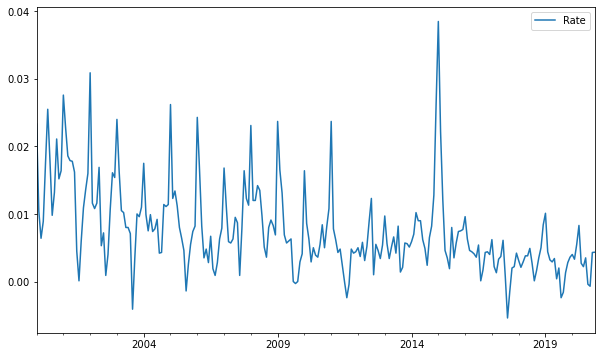

In [71]:
df_inf.plot(figsize=(10, 6));

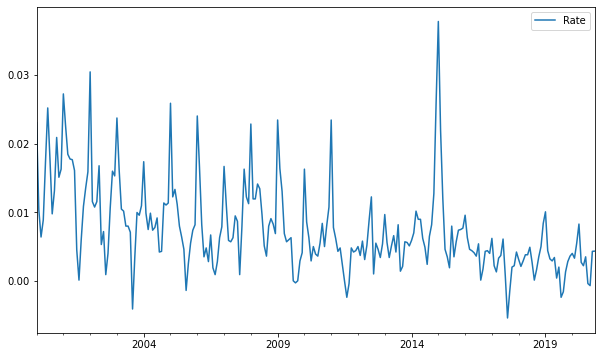

In [72]:
log_returns.plot(figsize = (10, 6))

ADF Statistic: -2.984231
p-value: 0.036394
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


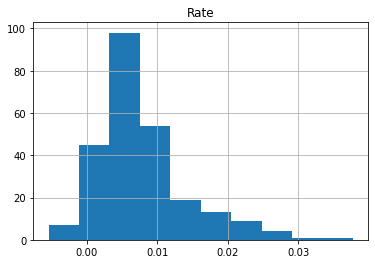

In [73]:
log_returns.hist()
from statsmodels.tsa.stattools import adfuller

X = log_returns.values

result = adfuller(X[:, 0])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

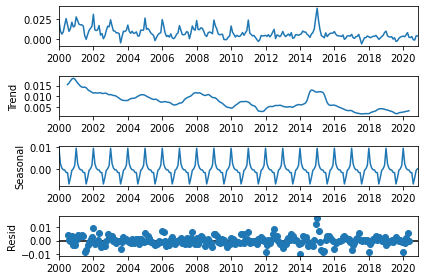

In [74]:
import statsmodels.api as sm

ts_decomp = sm.tsa.seasonal_decompose(log_returns, model = 'additive')
ts_decomp.plot()
plt.show()

In [55]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import statsmodels as sm

In [76]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [77]:
log_returns.index.freq = log_returns.index.inferred_freq

In [78]:
metric_aic = {}
X_train = log_returns[:int(len(log_returns)*0.8)]
X_test = log_returns[int(len(log_returns)*0.8):]

for pm in pdq:
    for pm_seasonal in seasonal_pdq:
        model = SARIMAX(100*log_returns.Rate, trend='n', order=pm, seasonal_order=pm_seasonal, enforce_stationarity = False, enforce_invertibility = False)
        model_aic = model.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(pm, pm_seasonal, model_aic.aic))
        metric_aic.update({(pm, pm_seasonal):model_aic.aic})

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:704.8453029552506
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:540.4227687657374
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:427.6393085505229
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:317.72703051823
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:390.2952459334134
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:285.0390805104587
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:350.41083604110855


C:\Users\Lena\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:314.61412219667386
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:530.1951309215835
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:391.40439144318896
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:318.3703795423627
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:209.3742402464278
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:283.3920803821371
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:184.62698919852767
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:250.68099999579334
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:202.92389610359572
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:375.4689608122651
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:307.3551249615866
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:332.9638459931732
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:193.3514697627707
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:266.29320122214745
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:187.42315896181753
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:250.96944534699293
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:189.15977749770656
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:369.9658595297336
A

C:\Users\Lena\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:166.68472943215346
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:232.10433604905415
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:146.59926564210403
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:212.9876165451492
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:164.59350312173171
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:360.2448076543418
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:286.4021637343052
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:285.6824749392441
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:161.43297104944315
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:233.18046065036538
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:146.34130321603402
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:212.16770738662962
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:156.47162567214065
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:374.03275796723034
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:306.7555548770831
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:334.3446917686116
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:193.13853323426463
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:266.3387924397814

In [79]:
{k: v for k, v in sorted(metric_aic.items(), key = lambda x : x[1])}

{((1, 0, 1), (1, 0, 1, 12)): 146.34130321603402,
 ((1, 0, 0), (1, 0, 1, 12)): 146.59926564210403,
 ((1, 0, 1), (1, 1, 1, 12)): 156.47162567214065,
 ((1, 1, 1), (1, 0, 1, 12)): 156.70253702364153,
 ((1, 1, 1), (1, 1, 1, 12)): 160.2495029902886,
 ((1, 0, 1), (0, 1, 1, 12)): 161.43297104944315,
 ((1, 1, 1), (0, 1, 1, 12)): 162.83916384689795,
 ((1, 0, 0), (1, 1, 1, 12)): 164.59350312173171,
 ((1, 0, 0), (0, 1, 1, 12)): 166.68472943215346,
 ((0, 0, 1), (1, 0, 1, 12)): 184.62698919852767,
 ((0, 1, 0), (1, 0, 1, 12)): 187.42315896181753,
 ((0, 1, 1), (1, 1, 1, 12)): 187.93911569322066,
 ((0, 1, 0), (1, 1, 1, 12)): 189.15977749770656,
 ((1, 1, 0), (1, 1, 1, 12)): 189.4269370618287,
 ((0, 1, 1), (1, 0, 1, 12)): 189.9423035976628,
 ((1, 1, 0), (1, 0, 1, 12)): 191.02922333526857,
 ((0, 1, 1), (0, 1, 1, 12)): 191.5212979409156,
 ((1, 1, 0), (0, 1, 1, 12)): 193.13853323426463,
 ((0, 1, 0), (0, 1, 1, 12)): 193.3514697627707,
 ((0, 0, 1), (1, 1, 1, 12)): 202.92389610359572,
 ((0, 0, 1), (0, 1, 1, 12

In [80]:
mod = SARIMAX(100*log_returns.Rate, trend='n', order=(1,0,1), seasonal_order=(1, 0, 1, 12))
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rate   No. Observations:                  251
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 -95.925
Date:                            Thu, 17 Dec 2020   AIC                            201.850
Time:                                    20:49:57   BIC                            219.477
Sample:                                01-01-2000   HQIC                           208.944
                                     - 11-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6839      0.066     10.299      0.000       0.554       0.814
ma.L1          0.1147      0.092   

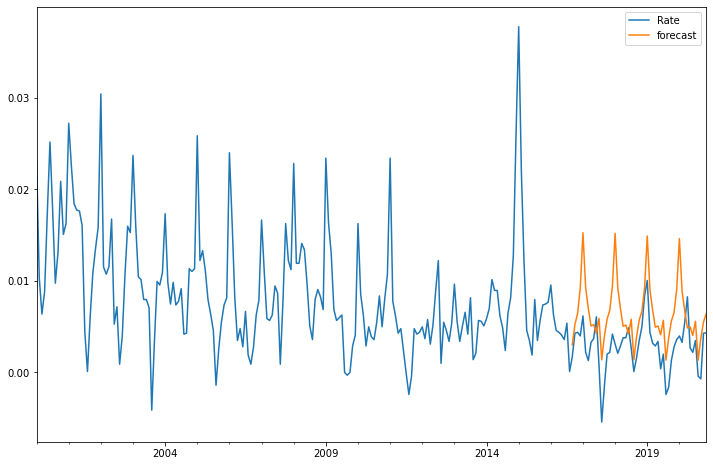

In [81]:
log_returns['forecast'] = results.predict(start = 200, end= 250, dynamic= True)  /100
log_returns[['Rate', 'forecast']].plot(figsize=(12, 8))

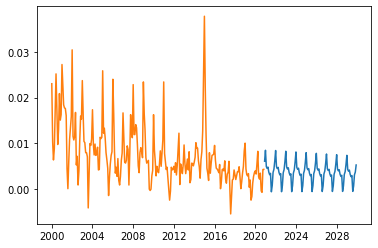

In [94]:
yhat = results.predict(start=len(log_returns), end=len(log_returns) + 12*9)
plt.plot(yhat/100)
plt.plot(log_returns.Rate)

In [100]:
index1 = pd.date_range(start='11/1/2020', end='11/1/2029', freq='MS')
df_inf1= pd.DataFrame(index=index1)
df_inf1['Rate, %']=yhat
df_inf1.dropna()

,"Rate, %"
2020-12-01,0.609657
2021-01-01,0.848999
2021-02-01,0.492553
2021-03-01,0.452318
2021-04-01,0.481046
...,...
2029-07-01,0.297087
2029-08-01,-0.049039
2029-09-01,0.068376
2029-10-01,0.313598
